# Lab_20_Module_2

In [60]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings


# Challenge 1 - Loading and Evaluating The Data


In [2]:
data =  pd.read_excel(r'C:\Users\Mtime\OneDrive\Bureau\sub_1.xlsx')
data.head()

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [3]:
data.isna().sum()

Unnamed: 0            0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

1.How many rows and columns are in our data?



In [4]:
data.shape

(1751, 13)

In [6]:
date_index  =  pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods = 1751)
data.index = date_index


In [7]:
data

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the statsmodels.api submodule and plot the decomposed plot of userAcceleration.x. Set freq=60 in the seasonal_decompose function. Your graph should look like the one below.

C:\Users\Mtime\AppData\Local\Temp/ipykernel_41408/83709390.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(data['userAcceleration.x'], freq=60)


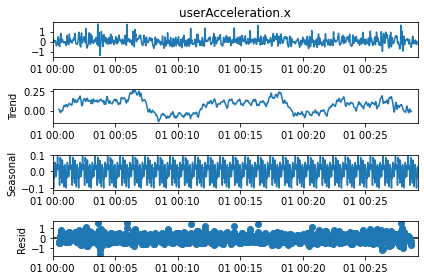

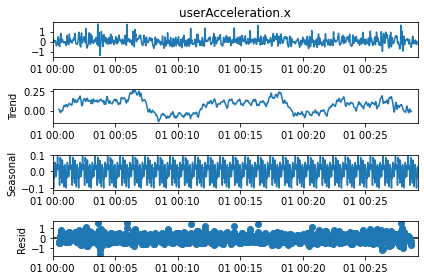

In [9]:
result= sm.tsa.seasonal_decompose(data['userAcceleration.x'], freq=60)
result.plot()

Plot the decomposed time series of rotationRate.x also with a frequency of 60.



C:\Users\Mtime\AppData\Local\Temp/ipykernel_41408/3925232582.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result= sm.tsa.seasonal_decompose(data['rotationRate.x'], freq=60)


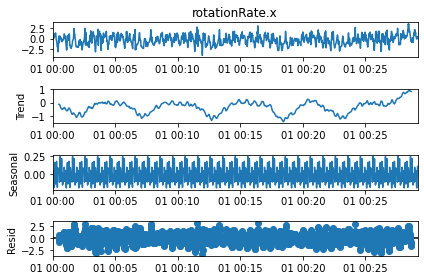

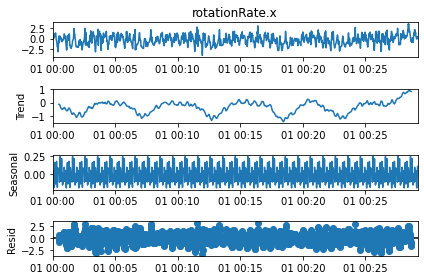

In [10]:
result= sm.tsa.seasonal_decompose(data['rotationRate.x'], freq=60)
result.plot()

# Challenge 2 - Modelling the Data


To model our data, we should look at a few assumptions. First, let's plot the lag_plot to detect any autocorrelation. Do this for userAcceleration.x.



Text(0.5, 1.0, 'Lag_Plot of userAcceleration.x')

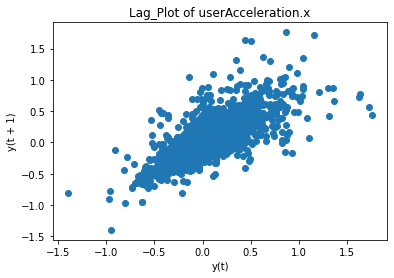

In [13]:
pd.plotting.lag_plot(data['userAcceleration.x'], lag=1);
plt.title('Lag_Plot of userAcceleration.x')

Create a lag plot for rotationRate.x



Text(0.5, 1.0, 'lag_title fo rotationRate.x')

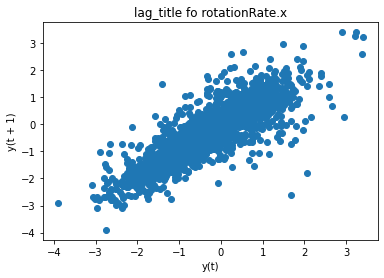

In [15]:
pd.plotting.lag_plot(data['rotationRate.x'])
plt.title('lag_title fo rotationRate.x')

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
result = adfuller(data['userAcceleration.x'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -17.957994086169755
p-value : 2.823439483037483e-30
Valeurs Critiques :
	1%: -3.434100824760071
	5%: -2.863196780129223
	10%: -2.5676520210882936


In [18]:
result = adfuller(data['rotationRate.x'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -5.269860625086413
p-value : 6.320230335912449e-06
Valeurs Critiques :
	1%: -3.4341465551936534
	5%: -2.863216966926812
	10%: -2.567662770090317


In [19]:
# the p value for two columns greater than 5%, so we can say that temporel serie is stationary
# but p_value of rotationRate.x was greater than userAcceleration.x...

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


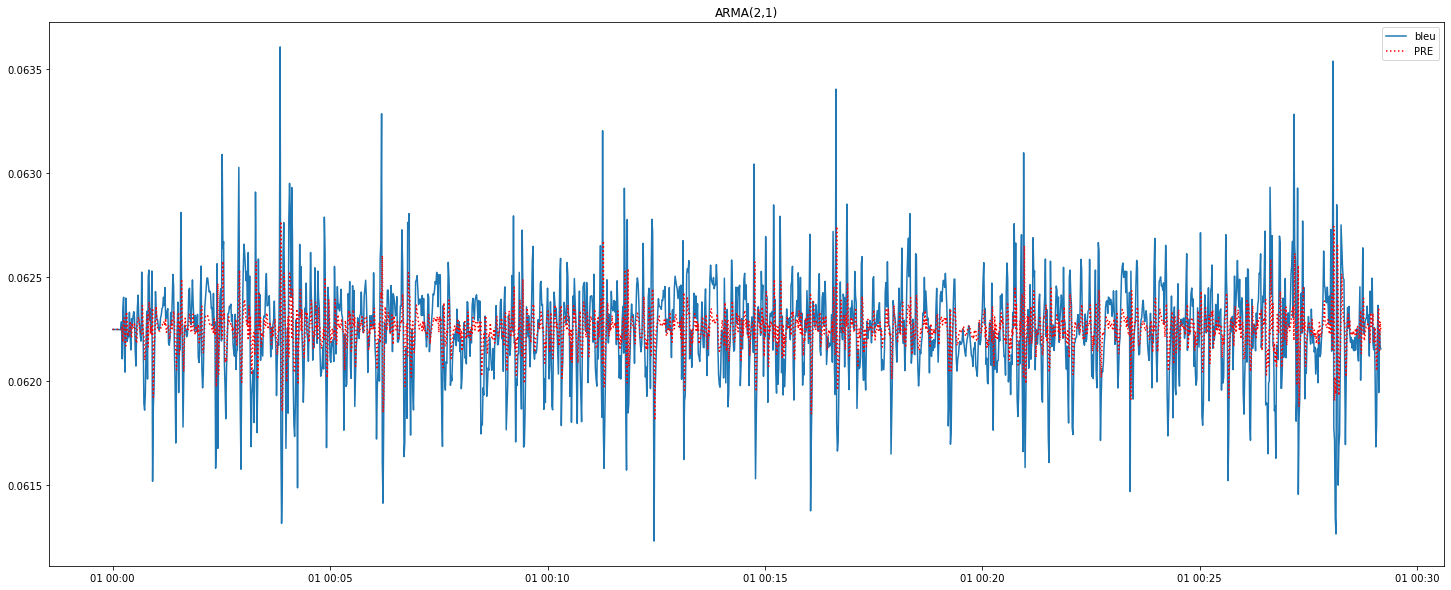

In [39]:
from statsmodels.tsa.arima_model import ARMA
plt.figure(figsize=(25, 10))
plt.plot(data['userAcceleration.x'],label = 'bleu')
arma = ARMA(data['userAcceleration.x'], order=(2, 1)).fit(disp =-1)
data['userAcceleration.x'] = arma.predict()
plt.plot(data['userAcceleration.x'],'r:',label = 'PRE')
plt.title("ARMA(2,1)")
plt.legend()
plt.show()

In [61]:
np.random.seed(42)
data = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [63]:
RMSE = rmse(data['userAcceleration.x'],data['predictions'])

KeyError: 'userAcceleration.x'